In [ ]:
#安裝繁體中文字體
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=e3e4bc96a6855849c3a34e18f4de960190c7cd4c08a690d801f23a289b6a72eb
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

In [ ]:
#上傳訓練資料和測試資料
from google.colab import files

uploaded = files.upload()

Saving train_data_241015.csv to train_data_241015.csv


In [ ]:
# 載入所需的套件
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# 載入資料
data = pd.read_csv("train_data_241015.csv")

# 資料前處理
# 將類別型特徵編碼
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


# 添加组合特徵: 組合 'Gender', 'hair_style', 'cloth_sytle'
#data['gender_cloth'] = data['Gender'].astype(str) + "_" + data['cloth_sytle'].astype(str)
#data['gender_hair'] = data['Gender'].astype(str) + "_" + data['hair_style'].astype(str)
#data['hair_cloth'] = data['hair_style'].astype(str) + "_" + data['cloth_sytle'].astype(str)
# 對新生成的組合特徵進行編碼
#label_encoders['gender_cloth'] = LabelEncoder()
#data['gender_cloth'] = label_encoders['gender_cloth'].fit_transform(data['gender_cloth'])



# 分割訓練集和測試集 並且設定測試集為20%
X = data[['Gender', 'Age', 'hair_style', 'cloth_sytle', 'body_height', 'body_type']]#, 'gender_cloth', 'gender_hair', 'hair_cloth'
y = data['Item Name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# 建立模型並訓練  隨機種子為42
model = RandomForestClassifier(n_estimators=700, max_depth=200, random_state=42)
model.fit(X_train, y_train)

# 預測並評估模型

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("模型準確率:", accuracy)


模型準確率: 0.8591304347826086


In [ ]:
# 測試一位客人的數據
new_data = pd.DataFrame({
    'Gender': ['F'],
    'Age': [57],
    'hair_style': ['Long'],
    'cloth_sytle': ['Formal'],
    'body_height': ['Short'],
    'body_type': ['Underweight']
})

# 將類別型特徵編碼
for col in new_data.select_dtypes(include=['object']).columns:
    new_data[col] = label_encoders[col].transform(new_data[col])

# 進行預測
predicted_item_index = model.predict(new_data)[0]
predicted_item_name = label_encoders['Item Name'].inverse_transform([predicted_item_index])[0]
print("預測的產品:", predicted_item_name)

In [ ]:


uploaded = files.upload()

In [ ]:
# 載入測試資料
test_data = pd.read_csv("test_data_241015.csv")

# 將類別型特徵編碼
for col in test_data.select_dtypes(include=['object']).columns:
    if col not in label_encoders:
        label_encoders[col] = LabelEncoder()
    test_data[col] = label_encoders[col].fit_transform(test_data[col])

# 進行預測
predicted_items_index = model.predict(test_data)
predicted_items_name = label_encoders['Item Name'].inverse_transform(predicted_items_index)
# 輸出預測
print("Predicted items:", predicted_items_name)

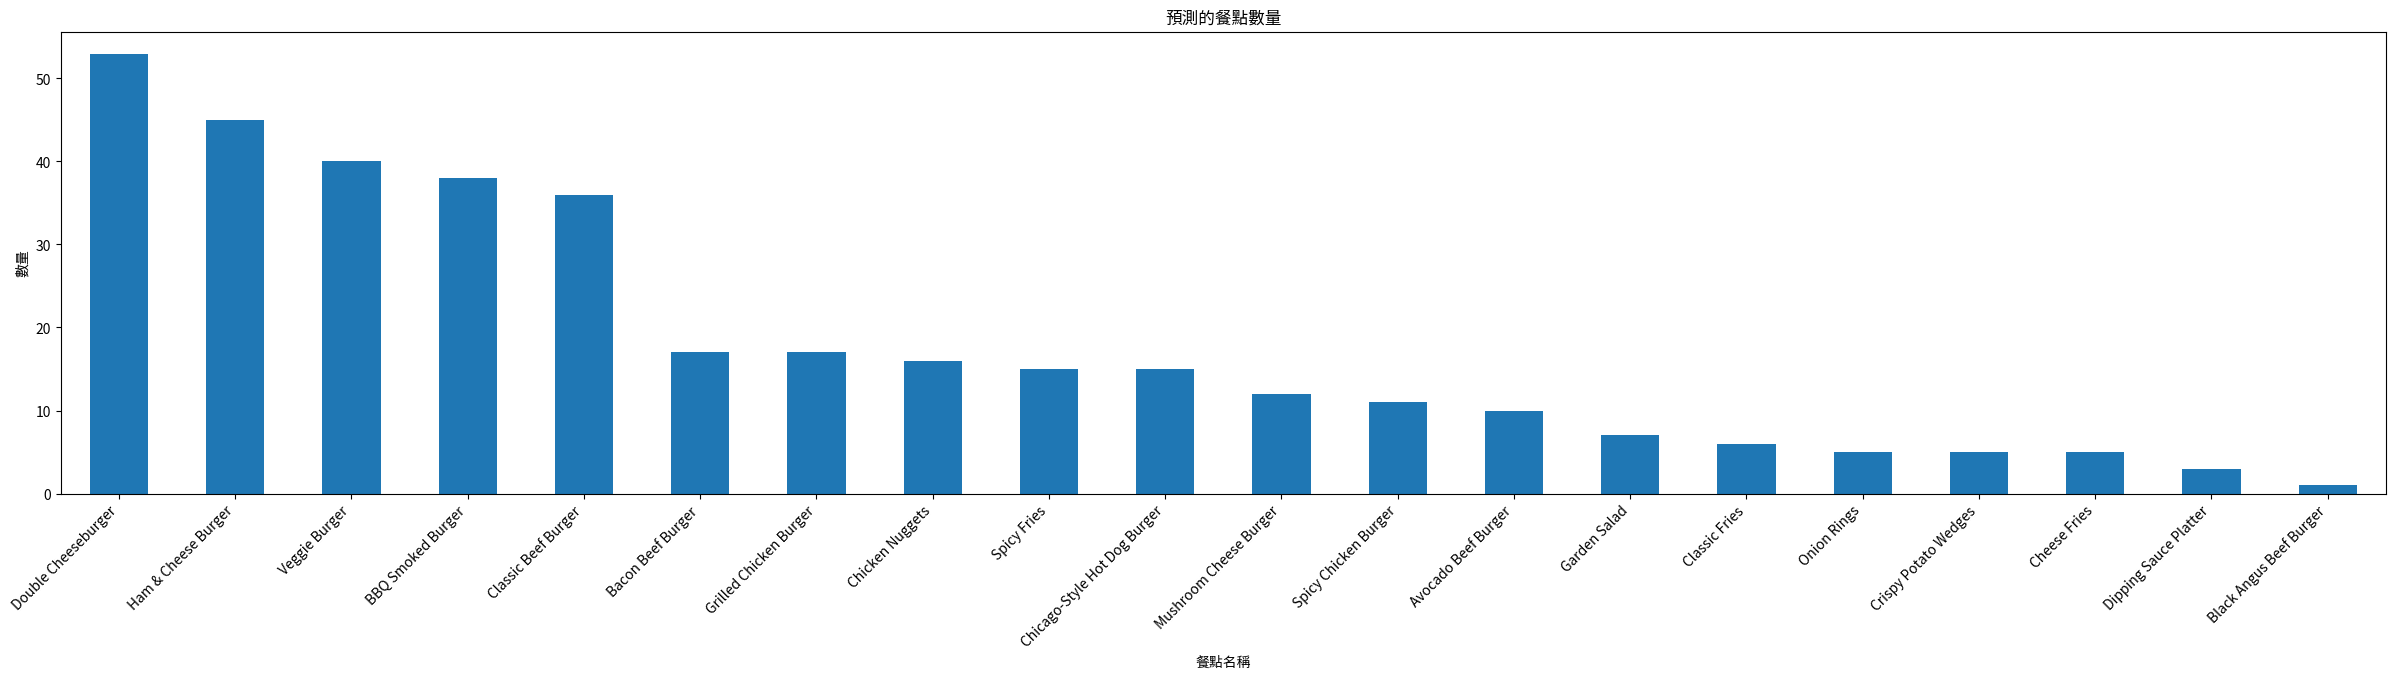

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

# 設置繁體中文字體
fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family="ChineseFont")

# 計算每一個餐點點的數量
item_counts = pd.Series(predicted_items_name).value_counts()

# 作圖
plt.figure(figsize=(30, 6))
item_counts.plot(kind='bar')
plt.title('預測的餐點數量')
plt.xlabel('餐點名稱')
plt.ylabel('數量')
plt.xticks(rotation=45,ha='right')
plt.show()


In [ ]:
import gradio as gr

# 定義一個簡單的函數，將輸入的文字反轉
def reverse_text(input_text):
    return input_text[::-1]

# 建立 Gradio 介面
with gr.Blocks() as demo:
    gr.Markdown("## 文字反轉工具")

    # 設置輸入和輸出框
    text_input = gr.Textbox(label="輸入文字")
    text_output = gr.Textbox(label="反轉後的文字")

    # 設置按鈕來執行文字反轉
    submit_button = gr.Button("反轉文字")

    # 當按鈕被按下時，調用 reverse_text 函數
    submit_button.click(reverse_text, inputs=text_input, outputs=text_output)

# 啟動 Gradio 介面
demo.launch()


In [ ]:
#上傳訓練資料和測試資料
from google.colab import files

uploaded = files.upload()

In [ ]:
#安裝繁體中文字體
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

# 載入所需的套件
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# 載入資料
data = pd.read_csv("train_data_241015.csv")

# 資料前處理
# 將類別型特徵編碼
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# 分割訓練集和測試集 並且設定測試集為20%
X = data[['Gender', 'Age', 'hair_style', 'cloth_sytle', 'body_height', 'body_type']]#, 'gender_cloth', 'gender_hair', 'hair_cloth'
y = data['Item Name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# 建立模型並訓練  隨機種子為42
model = RandomForestClassifier(n_estimators=700, max_depth=200, random_state=42)
model.fit(X_train, y_train)

# 預測並評估模型

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("模型準確率:", accuracy)

# 載入測試資料
test_data = pd.read_csv("test_data_241015.csv")

# 將類別型特徵編碼
for col in test_data.select_dtypes(include=['object']).columns:
    if col not in label_encoders:
        label_encoders[col] = LabelEncoder()
    test_data[col] = label_encoders[col].fit_transform(test_data[col])

# 進行預測
predicted_items_index = model.predict(test_data)
predicted_items_name = label_encoders['Item Name'].inverse_transform(predicted_items_index)
# 輸出預測
print("Predicted items:", predicted_items_name)

import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

# 設置繁體中文字體
fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family="ChineseFont")

# 計算每一個餐點點的數量
item_counts = pd.Series(predicted_items_name).value_counts()

# 作圖
plt.figure(figsize=(30, 6))
item_counts.plot(kind='bar')
plt.title('預測的餐點數量')
plt.xlabel('餐點名稱')
plt.ylabel('數量')
plt.xticks(rotation=45,ha='right')
plt.show()

# Gradio 介面
train_interface = gr.Interface(fn=train_model,inputs=gr.File(label="上傳訓練資料 (CSV)"),outputs="text")

with gr.Blocks() as predict_interface:
    with gr.Column():  # 使用 Column 進行上下排列
        upload_file = gr.File(label="上傳測試資料 (CSV)")
        output_image = gr.Image(label="預測結果")

    # 點擊後執行預測
    upload_file.change(make_prediction, inputs=upload_file, outputs=output_image)

# 合併兩個 Gradio 介面
app = gr.TabbedInterface([train_interface, predict_interface], ["訓練模型", "預測結果"])
app.launch(share=True)

In [ ]:
!pip install gradio

import wget
import pandas as pd
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

# 下載中文字體
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

# 設置繁體中文字體
fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family="ChineseFont")

# 全局變量
model = None
label_encoders = {}

def train_model(train_file):
    global model, label_encoders
    data = pd.read_csv(train_file.name)

    # 資料前處理
    for col in data.select_dtypes(include=['object']).columns:
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col])

    X = data[['Gender', 'Age', 'hair_style', 'cloth_sytle', 'body_height', 'body_type']]
    y = data['Item Name']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 建立模型並訓練
    model = RandomForestClassifier(n_estimators=700, max_depth=200, random_state=42)
    model.fit(X_train, y_train)

    # 預測並評估模型
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return f"模型準確率: {accuracy:.2f}"

def make_prediction(test_file):
    global model, label_encoders
    test_data = pd.read_csv(test_file.name)

    # 將類別型特徵編碼
    for col in test_data.select_dtypes(include=['object']).columns:
        if col not in label_encoders:
            label_encoders[col] = LabelEncoder()
        test_data[col] = label_encoders[col].fit_transform(test_data[col])

    # 進行預測
    predicted_items_index = model.predict(test_data)
    predicted_items_name = label_encoders['Item Name'].inverse_transform(predicted_items_index)

    # 計算每一個餐點點的數量
    item_counts = pd.Series(predicted_items_name).value_counts()

    # 作圖
    plt.figure(figsize=(80, 50))
    item_counts.plot(kind='bar')
    plt.title('預測的餐點數量')
    plt.xlabel('餐點名稱')
    plt.ylabel('數量')
    plt.xticks(rotation=45, ha='right')

    # 保存圖形
    plt.savefig("predicted_items.png")
    #plt.close()

    return "predicted_items.png"
train_interface = gr.Interface(fn=train_model,inputs=gr.File(label="上傳訓練資料 (CSV)"),outputs="text")

with gr.Blocks() as predict_interface:
    with gr.Column():  # 使用 Column 進行上下排列
        upload_file = gr.File(label="上傳測試資料 (CSV)")
        output_image = gr.Image(label="預測結果")

    # 點擊後執行預測
    upload_file.change(make_prediction, inputs=upload_file, outputs=output_image)

# 合併兩個 Gradio 介面
app = gr.TabbedInterface([train_interface, predict_interface], ["訓練模型", "預測結果"])
app.launch(share=True) #"predicted_items.png"

# Gradio 介

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


ModuleNotFoundError: No module named 'wget'

In [ ]:
#正式的檔案
!pip install wget gradio

import wget
import pandas as pd
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

# 下載中文字體
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

# 設置繁體中文字體
fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family="ChineseFont")

# 全局變量
model = None
label_encoders = {}

def train_model(train_file):
    global model, label_encoders
    data = pd.read_csv(train_file.name)

    # 資料前處理
    for col in data.select_dtypes(include=['object']).columns:
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col])

    X = data[['Gender', 'Age', 'hair_style', 'cloth_sytle', 'body_height', 'body_type']]
    y = data['Item Name']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 建立模型並訓練
    model = RandomForestClassifier(n_estimators=700, max_depth=200, random_state=42)
    model.fit(X_train, y_train)

    # 預測並評估模型
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return f"模型準確率: {accuracy:.2f}"

def make_prediction(test_file):
    global model, label_encoders
    test_data = pd.read_csv(test_file.name)

    # 將類別型特徵編碼
    for col in test_data.select_dtypes(include=['object']).columns:
        if col not in label_encoders:
            label_encoders[col] = LabelEncoder()
        test_data[col] = label_encoders[col].fit_transform(test_data[col])

    # 進行預測
    predicted_items_index = model.predict(test_data)
    predicted_items_name = label_encoders['Item Name'].inverse_transform(predicted_items_index)

    # 計算每一個餐點點的數量
    item_counts = pd.Series(predicted_items_name).value_counts()

    # 作圖
    plt.figure(figsize=(80, 15))
    item_counts.plot(kind='bar')
    plt.title('預測的餐點數量')
    plt.xlabel('餐點名稱')
    plt.ylabel('數量')
    plt.xticks(rotation=45, ha='right')

    # 保存圖形
    plt.savefig("predicted_items.png")
    plt.close()

    return "predicted_items.png"

# Gradio 介面
train_interface = gr.Interface(fn=train_model,
                               inputs=gr.File(label="上傳訓練資料 (CSV)"),
                               outputs="text")

# 更新 predict_interface 部分
with gr.Blocks() as predict_interface:
    with gr.Column():
        file_input = gr.File(label="上傳測試資料 (CSV)")
        image_output = gr.Image(label="預測結果圖", type="filepath")

    predict_btn = gr.Button("開始預測")
    predict_btn.click(fn=make_prediction, inputs=file_input, outputs=image_output)
# predict_interface = gr.Interface(fn=make_prediction,
#                                  inputs=gr.File(label="上傳測試資料 (CSV)"),
#                                  outputs="image")

# 合併兩個 Gradio 介面
app = gr.TabbedInterface([train_interface, predict_interface], ["訓練模型", "預測結果"])
app.launch(share=True)
####物凍

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=c653398db053e783c305bdc0f6d78a66d6d890cc03b5d67cb6831e919eecbbd7
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Succes

KeyboardInterrupt: 

In [ ]:
#2024/11/11 更改
!pip install wget gradio
import wget
import pandas as pd
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

# 下載中文字體
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

# 設置繁體中文字體
fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family="ChineseFont")

# 全局變量
model = None
label_encoders = {}

def train_model(train_file):
    global model, label_encoders
    try:
        data = pd.read_csv(train_file)

        # 資料前處理
        for col in data.select_dtypes(include=['object']).columns:
            label_encoders[col] = LabelEncoder()
            data[col] = label_encoders[col].fit_transform(data[col])

        X = data[['Gender', 'Age', 'hair_style', 'cloth_sytle', 'body_height', 'body_type']]
        y = data['Item Name']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # 建立模型並訓練
        model = RandomForestClassifier(n_estimators=700, max_depth=200, random_state=42)
        model.fit(X_train, y_train)

        # 預測並評估模型
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        return f"模型準確率: {accuracy:.2f}"
    except Exception as e:
        return f"錯誤: {e}"

def make_prediction(test_file):
    global model, label_encoders
    try:
        test_data = pd.read_csv(test_file.name)

        # 將類別型特徵編碼
        for col in test_data.select_dtypes(include=['object']).columns:
            if col not in label_encoders:
                label_encoders[col] = LabelEncoder()
            test_data[col] = label_encoders[col].fit_transform(test_data[col])

        # 進行預測
        predicted_items_index = model.predict(test_data)
        predicted_items_name = label_encoders['Item Name'].inverse_transform(predicted_items_index)

        # 將預測結果加入原始資料
        test_data['Predicted Item Name'] = predicted_items_name

        # 儲存預測結果為 CSV
        output_csv = "predicted_results.csv"
        test_data.to_csv(output_csv, index=False)

        # 計算每一個餐點點的數量
        item_counts = pd.Series(predicted_items_name).value_counts()

        # 作圖
        plt.figure(figsize=(80, 15))
        item_counts.plot(kind='bar')
        plt.title('預測的餐點數量')
        plt.xlabel('餐點名稱')
        plt.ylabel('數量')
        plt.xticks(rotation=45, ha='right')

        # 保存圖形
        plt.savefig("predicted_items.png")
        plt.close()

        return output_csv, "predicted_items.png"
    except Exception as e:
        return f"錯誤: {e}"

def compare_results(actual_file):
    try:
        # 自動讀取預測結果
        predicted_data = pd.read_csv("predicted_results.csv")
        actual_data = pd.read_csv(actual_file)

        # 確認資料中有 'Predicted Item Name' 欄位
        if 'Predicted Item Name' not in predicted_data.columns or 'Predicted Item Name' not in actual_data.columns:
            return "資料缺少 'Predicted Item Name' 欄位。"

        # 進行比對
        predicted_names = predicted_data['Predicted Item Name']
        actual_names = actual_data['Predicted Item Name']

        # 確保兩個資料長度相同
        if len(predicted_names) != len(actual_names):
            return f"預測資料和實際資料長度不一致（預測: {len(predicted_names)} 筆，實際: {len(actual_names)} 筆）。"

        # 計算準確率
        is_correct = predicted_names == actual_names
        accuracy = is_correct.mean()

        # 錯誤預測分析
        incorrect_predictions = pd.DataFrame({
            'Predicted': predicted_names[~is_correct],
            'Actual': actual_names[~is_correct]
        })

        # 儲存錯誤預測清單
        incorrect_csv = "incorrect_predictions.csv"
        incorrect_predictions.to_csv(incorrect_csv, index=False)

        return f"準確率: {accuracy:.2%}", incorrect_csv
    except Exception as e:
        return f"錯誤: {e}"

# Gradio 介面
train_interface = gr.Interface(fn=train_model,
                               inputs=gr.File(label="上傳訓練資料 (CSV)"),
                               outputs="text")

# 預測結果介面
with gr.Blocks() as predict_interface:
    with gr.Column():
        file_input = gr.File(label="上傳測試資料 (CSV)")
        csv_output = gr.File(label="下載預測結果 (CSV)")
        image_output = gr.Image(label="預測結果圖", type="filepath")

    predict_btn = gr.Button("開始預測")
    predict_btn.click(fn=make_prediction, inputs=file_input, outputs=[csv_output, image_output])

# 比較結果介面
with gr.Blocks() as compare_interface:
    with gr.Column():
        actual_file = gr.File(label="上傳實際數據 (CSV)")
        accuracy_output = gr.Textbox(label="準確率")
        incorrect_output = gr.File(label="下載錯誤預測清單 (CSV)")

    compare_btn = gr.Button("開始比對")
    compare_btn.click(fn=compare_results, inputs=actual_file, outputs=[accuracy_output, incorrect_output])

# 合併 Gradio 介面
app = gr.TabbedInterface([train_interface, predict_interface, compare_interface],
                         ["訓練模型", "預測結果", "比較實際數據"])
app.launch(share=True)


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=5b39e6e456d0928825083a8ff92c1b7231d79c4ef762cf02aef71ecdad09c1c6
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Succes